<a href="https://colab.research.google.com/github/rachocr/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

## B. Load and understand the dataset

In [ ]:
df = pd.read_excel('friend_dataset.xlsx')
df.head()

,name,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers,personality
0,Mark Jasper Iglesias,1,1,1,1524,1
1,Elijah Martin Cruz,1,1,1,1324,1
2,Lanze Andrei Racho,0,1,1,549,0
3,John Paul Ferido,1,0,0,1314,0
4,Kaide Cano,1,1,1,429,1


1. Display the summary of all the features of the dataset using `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    54 non-null     object
 1   posts_frequently        54 non-null     int64 
 2   active_in_social_media  54 non-null     int64 
 3   replies_to_comments     54 non-null     int64 
 4   number_of_followers     54 non-null     int64 
 5   personality             54 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.7+ KB


In [ ]:
df.columns

Index(['name', 'posts_frequently', 'active_in_social_media',
       'replies_to_comments', 'number_of_followers', 'personality'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
name,0
posts_frequently,0
active_in_social_media,0
replies_to_comments,0
number_of_followers,0
personality,0


2. Display the total number of samples from each label using `.value_counts()`

In [ ]:
personality_counts = df['personality'].value_counts()
print(personality_counts)

personality
1    27
0    27
Name: count, dtype: int64


In [ ]:
df.shape

(54, 6)

In [ ]:
for column in df.columns[1:]:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'posts_frequently':
[1 0]

Unique values in column 'active_in_social_media':
[1 0]

Unique values in column 'replies_to_comments':
[1 0]

Unique values in column 'number_of_followers':
[1524 1324  549 1314  429 1031 1476  591  301  929  815 1311 2158 1297
  675  520  955 1344 1355 1565 1038  885  462 1049  644  768 1198 1114
  661  552  305  498 1337 1269 1001 1728 1250 1000  884  712 3847 1342
 1771 2670  613  823  651 1443 1202  100   63  123  487]

Unique values in column 'personality':
[1 0]



In [ ]:
df_cleaned = df.drop('name', axis=1)
df_cleaned.head()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers,personality
0,1,1,1,1524,1
1,1,1,1,1324,1
2,0,1,1,549,0
3,1,0,0,1314,0
4,1,1,1,429,1


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
X = df_cleaned.iloc[:, :-1]

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
y = df_cleaned.iloc[:, -1]

print(X.shape, y.shape)

(54, 4) (54,)


In [ ]:
X.head()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers
0,1,1,1,1524
1,1,1,1,1324
2,0,1,1,549
3,1,0,0,1314
4,1,1,1,429


In [ ]:
y.head()

,personality
0,1
1,1
2,0
3,0
4,1


5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 4)
(17, 4)
(37,)
(17,)


## D. Create the model

Accuracy for k = 1 : 0.4117647058823529
Accuracy for k = 2 : 0.35294117647058826
Accuracy for k = 3 : 0.5294117647058824
Accuracy for k = 4 : 0.5294117647058824
Accuracy for k = 5 : 0.5294117647058824
Accuracy for k = 6 : 0.5294117647058824
Accuracy for k = 7 : 0.47058823529411764
Accuracy for k = 8 : 0.47058823529411764
Accuracy for k = 9 : 0.47058823529411764
Accuracy for k = 10 : 0.4117647058823529


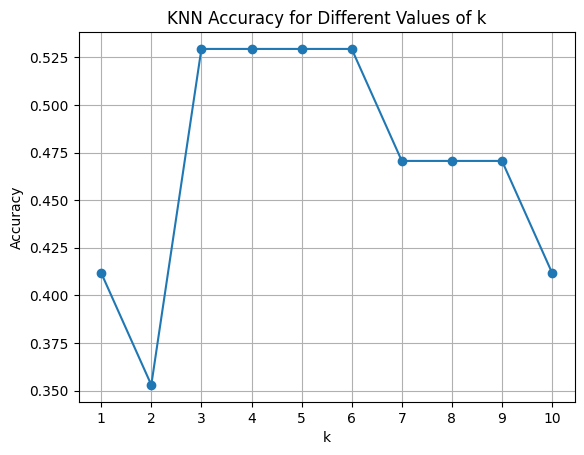

In [ ]:
accuracies = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print("Accuracy for k =", i, ":", acc)

plt.plot(range(1, 11), accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

7. Train the model using the `.fit()`

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

8. Test the model using the `.predict()`

In [ ]:
knn.predict(X_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

## Evaluate the model

9. Create a confusion matrix

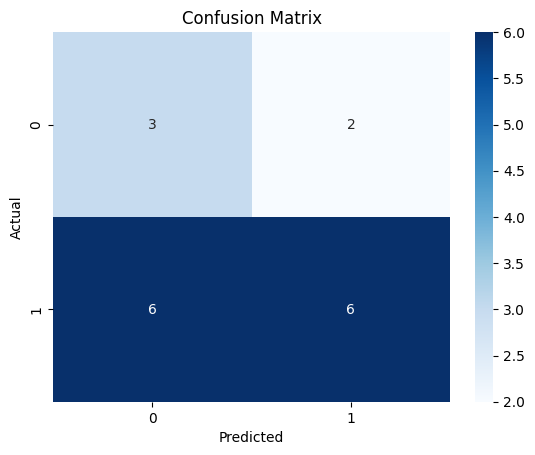

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

10. Display the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5294117647058824


11. Display the precision

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

Precision: 0.6274509803921569


12. Display the recall

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")


Recall: 0.5294117647058824


13. Display the f1-score

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.549579831932773


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.75      0.50      0.60        12

    accuracy                           0.53        17
   macro avg       0.54      0.55      0.51        17
weighted avg       0.63      0.53      0.55        17



In [ ]:
knn.predict([[0, 1, 0, 1000]])

array([0])